In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys


In [2]:
import functions.parse_data as parse
data_clear=parse.parse('cloudrm_clear.dat')
data_ice=parse.parse('cloudrm_ice.dat')
data_mixed=parse.parse('cloudrm_mixed.dat')
data_water=parse.parse('cloudrm_water.dat')

data_all=pd.concat([data_water,data_mixed,data_ice])
data_all=data_all.drop(columns=['Cloud_B01','Clear_B01'])

In [3]:
data_all.columns

Index(['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05', 'Cloud_B06',
       'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10', 'Cloud_B11',
       'Cloud_B12', 'Cloud_B13', 'Clear_B02', 'Clear_B03', 'Clear_B04',
       'Clear_B05', 'Clear_B06', 'Clear_B07', 'Clear_B08', 'Clear_B09',
       'Clear_B10', 'Clear_B11', 'Clear_B12', 'Clear_B13', 'Sat_Zenith_Angle',
       'Sun_Zenith_Angle', 'Azimuth_Diff_Angle', 'COT', 'Cloud_Type',
       'Profile_ID', 'GOT', 'Water_Vapor', 'Surface_Desc'],
      dtype='object')

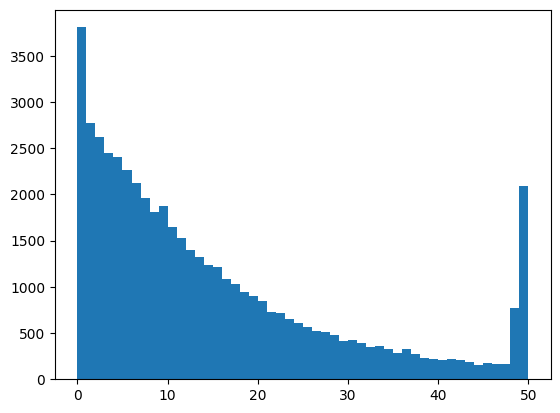

In [4]:
plt.hist(data_water['COT'],bins=50)
plt.show()

In [5]:
data_clear.columns

Index(['Cloud_B01', 'Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05',
       'Cloud_B06', 'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10',
       'Cloud_B11', 'Cloud_B12', 'Cloud_B13', 'Clear_B01', 'Clear_B02',
       'Clear_B03', 'Clear_B04', 'Clear_B05', 'Clear_B06', 'Clear_B07',
       'Clear_B08', 'Clear_B09', 'Clear_B10', 'Clear_B11', 'Clear_B12',
       'Clear_B13', 'Sat_Zenith_Angle', 'Sun_Zenith_Angle',
       'Azimuth_Diff_Angle', 'COT', 'Cloud_Type', 'Profile_ID', 'GOT',
       'Water_Vapor', 'Surface_Desc'],
      dtype='object')

In [6]:
data_water.COT.unique()

array([23.397,  2.452,  6.564, ..., 33.327, 29.08 , 21.735])

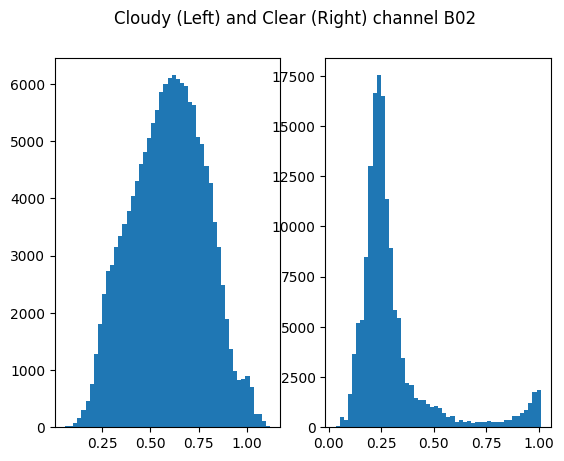

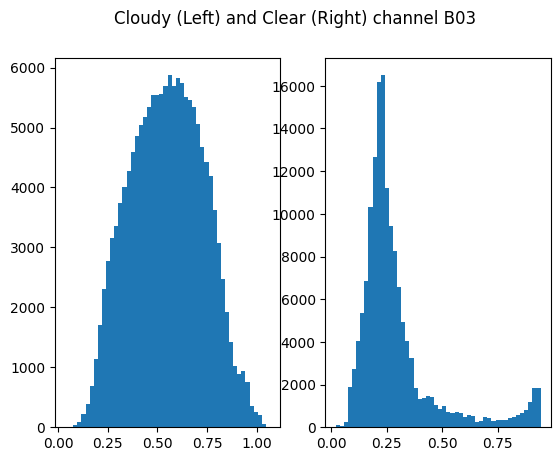

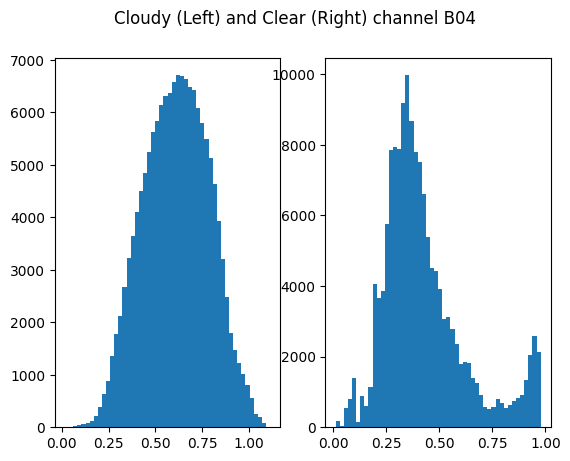

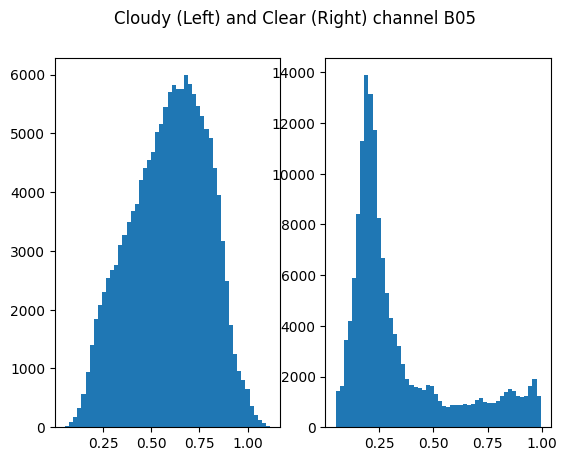

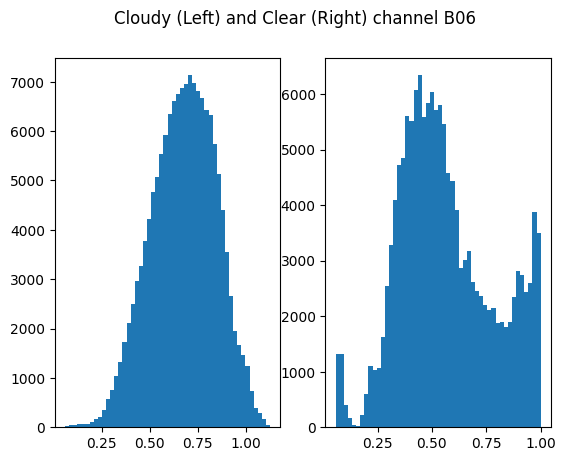

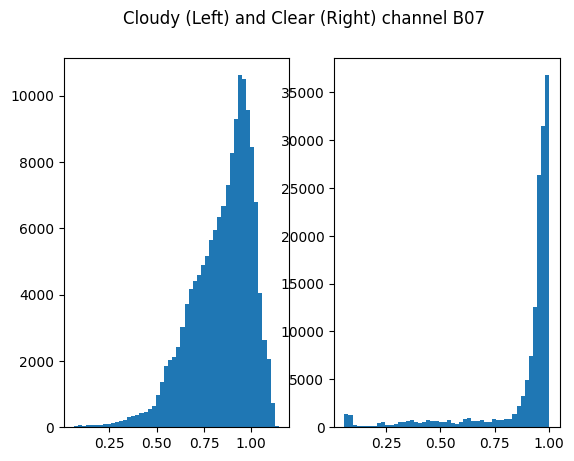

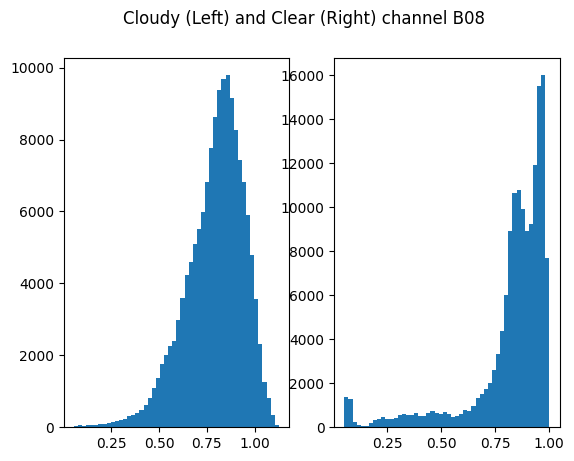

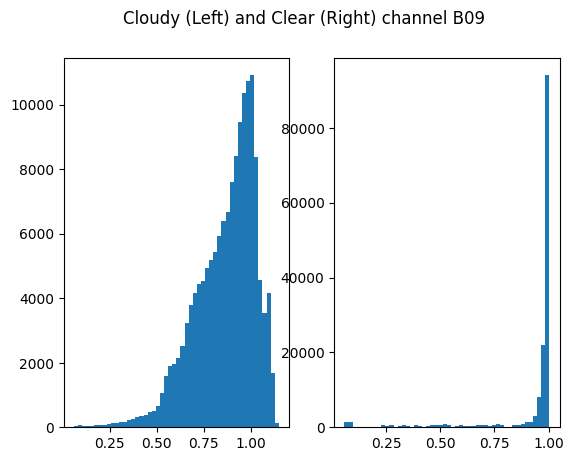

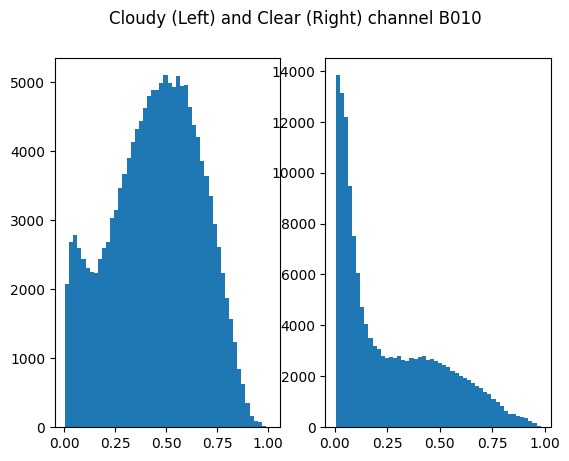

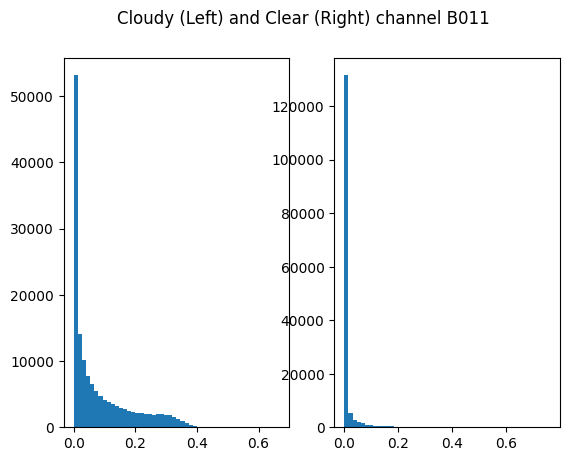

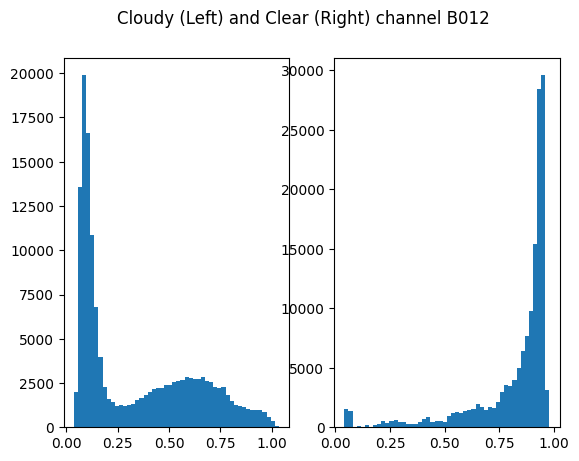

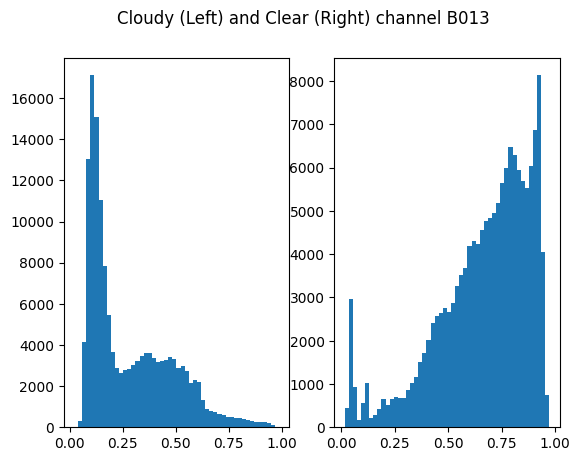

In [7]:
for i in range(2,14):
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.suptitle("Cloudy (Left) and Clear (Right) channel B0"+str(i))
    if i<=9:
        ax1.hist(data_all['Cloud_'+'B0'+str(i)],bins=50)
        ax2.hist(data_all['Clear_'+'B0'+str(i)],bins=50)
    else:
        ax1.hist(data_all['Cloud_'+'B'+str(i)],bins=50)
        ax2.hist(data_all['Clear_'+'B'+str(i)],bins=50)

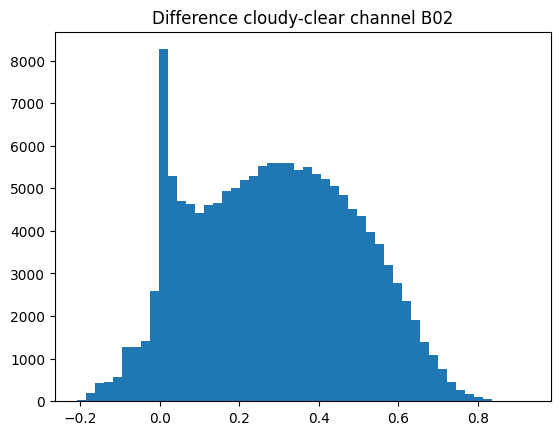

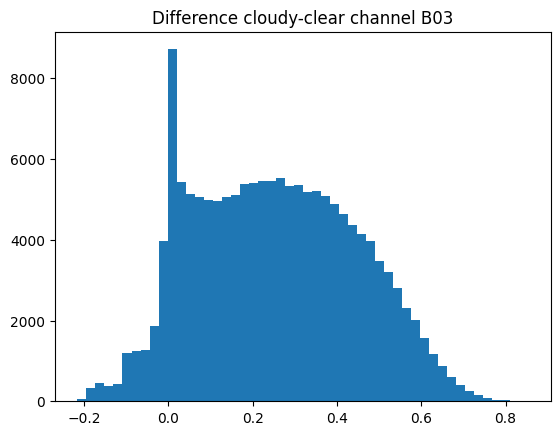

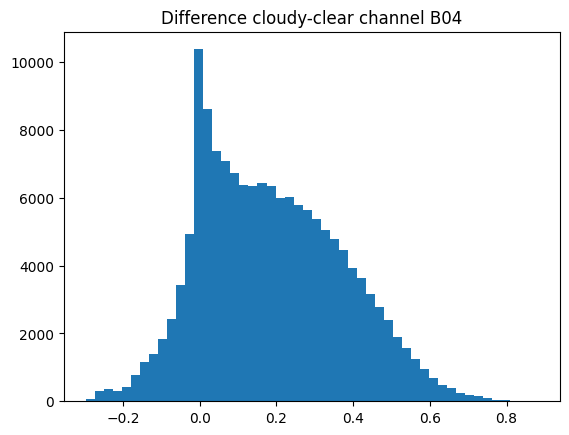

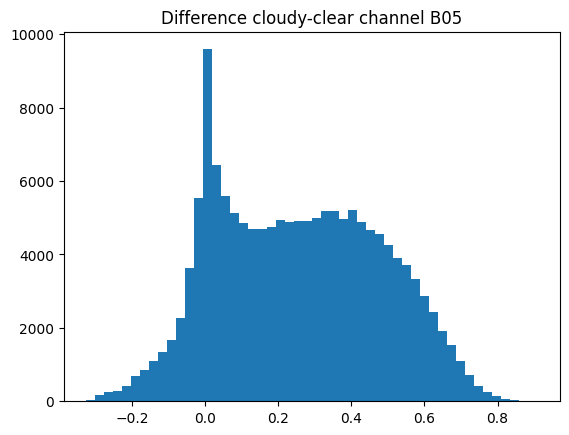

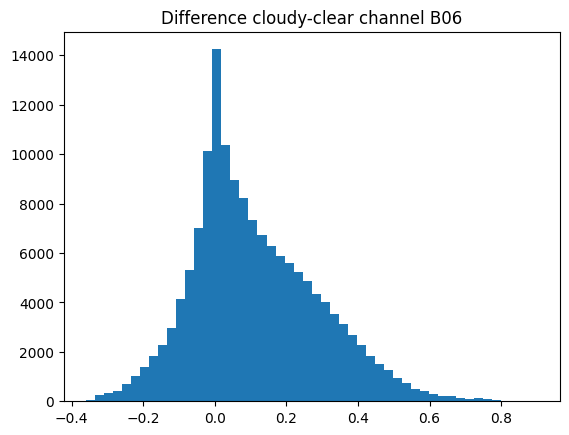

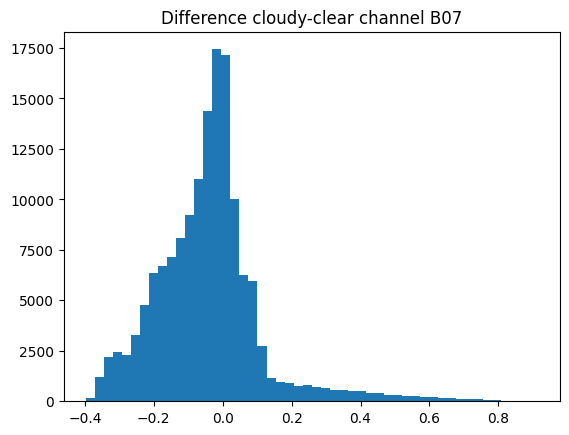

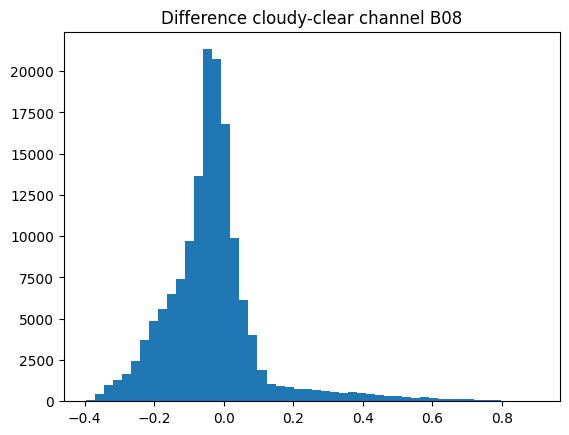

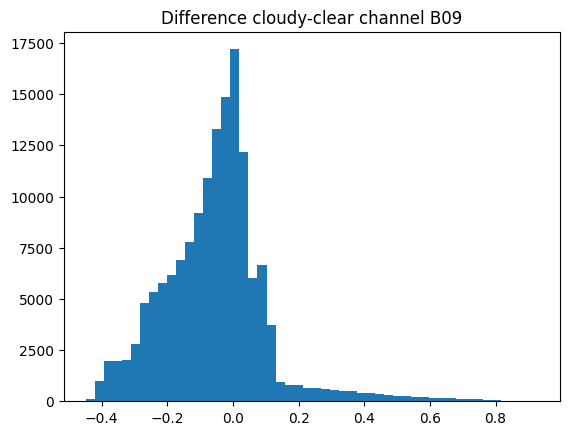

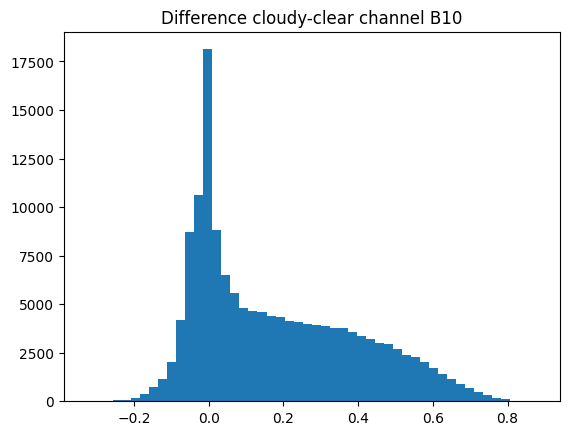

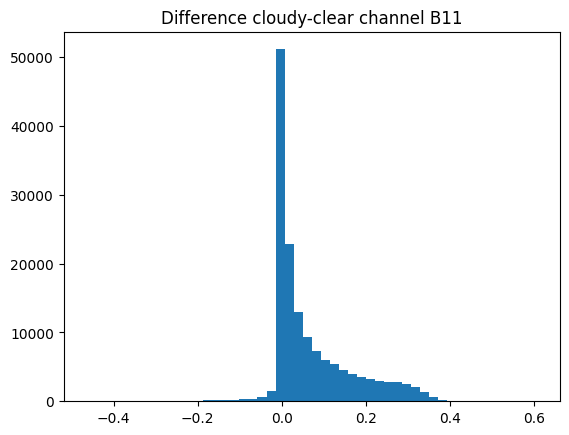

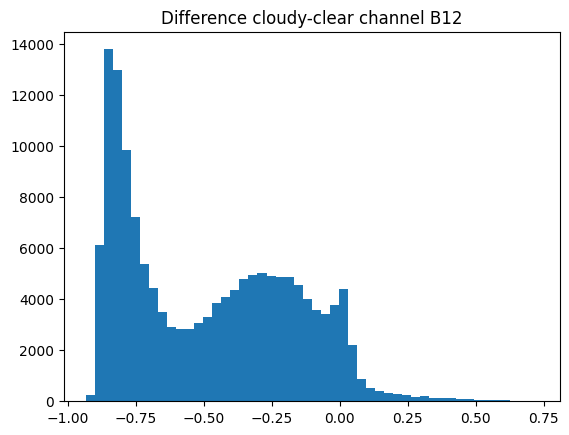

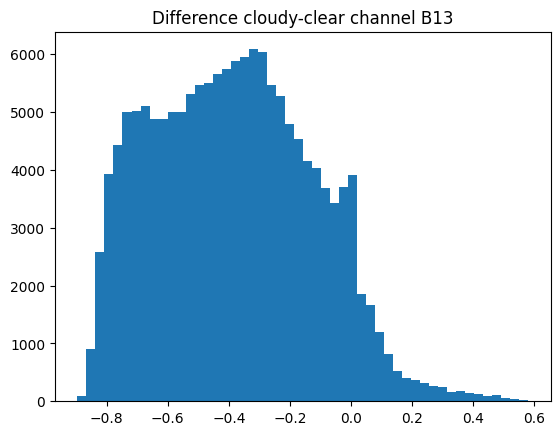

In [8]:
for i in range(2,14):
    
    if i<=9:
        plt.hist(data_all['Cloud_'+'B0'+str(i)]-data_all['Clear_'+'B0'+str(i)],bins=50)
        plt.title("Difference cloudy-clear channel B0"+str(i))
        plt.show()
    else:
        plt.hist(data_all['Cloud_'+'B'+str(i)]-data_all['Clear_'+'B'+str(i)],bins=50)
        plt.title("Difference cloudy-clear channel B"+str(i))
        plt.show()

In [9]:
np.correlate(data_all['Clear_B07'],data_all['Cloud_B07'])

array([115068.93359205])

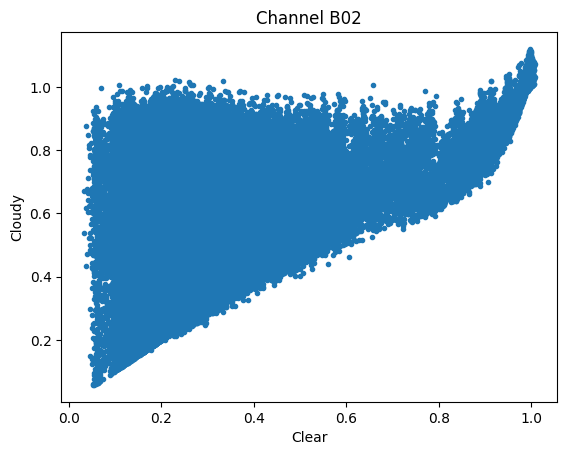

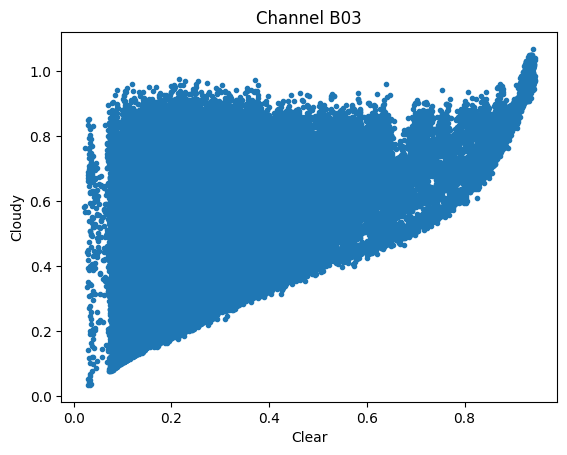

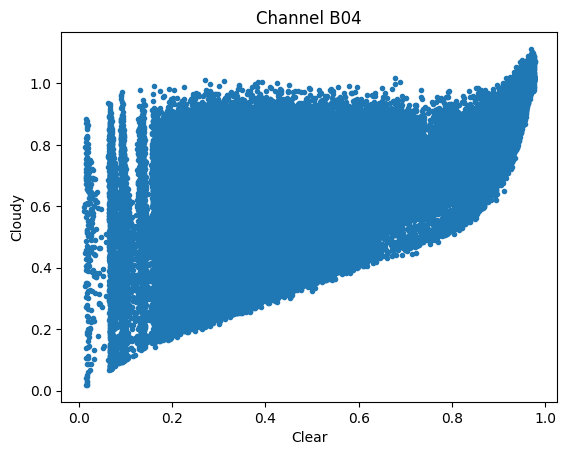

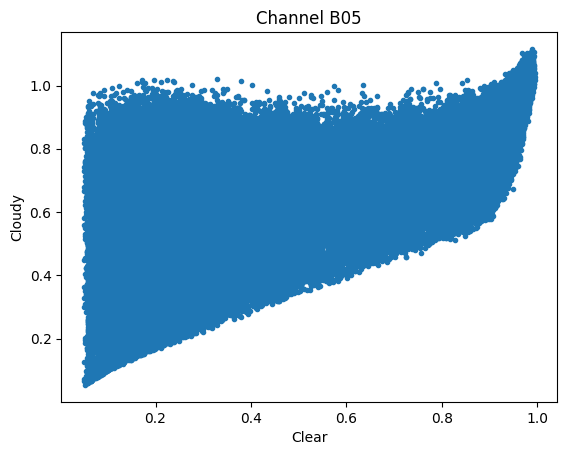

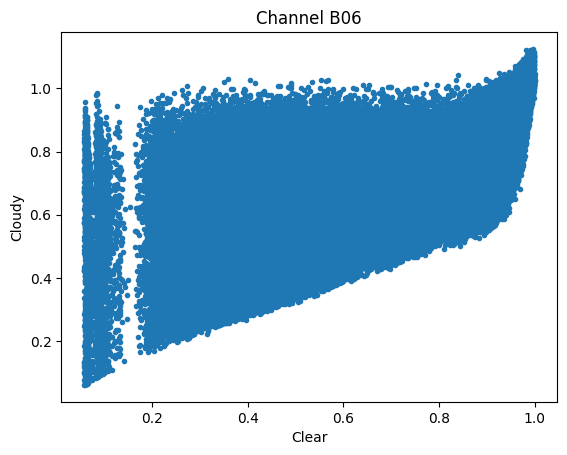

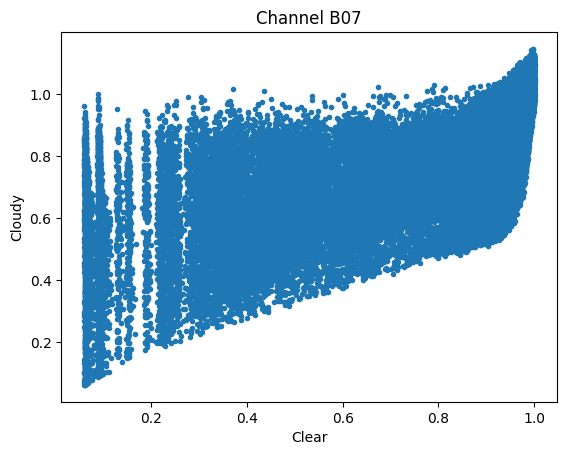

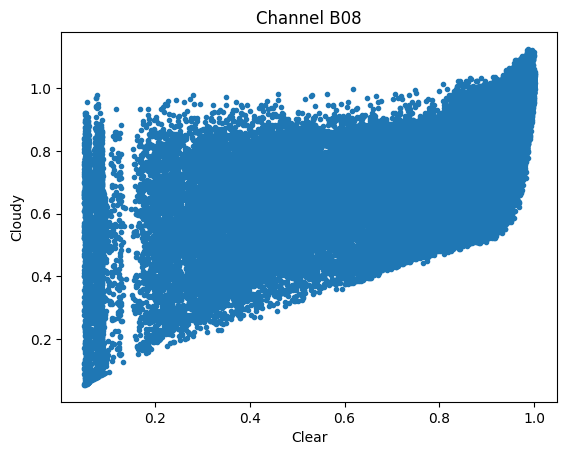

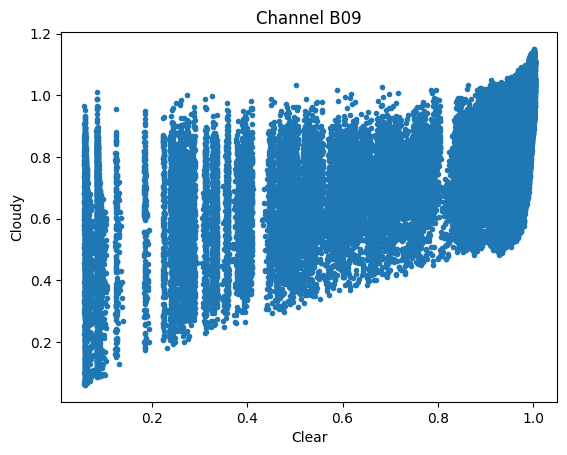

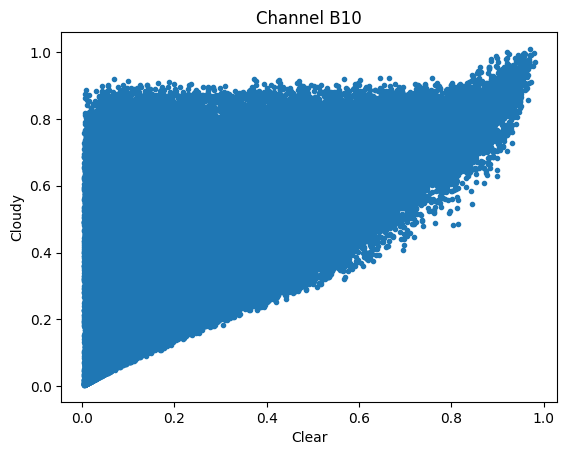

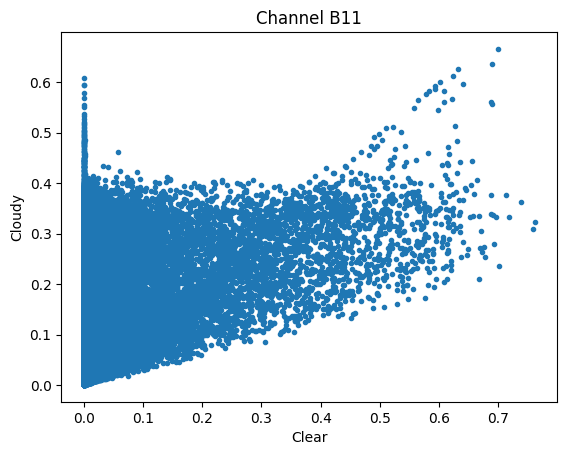

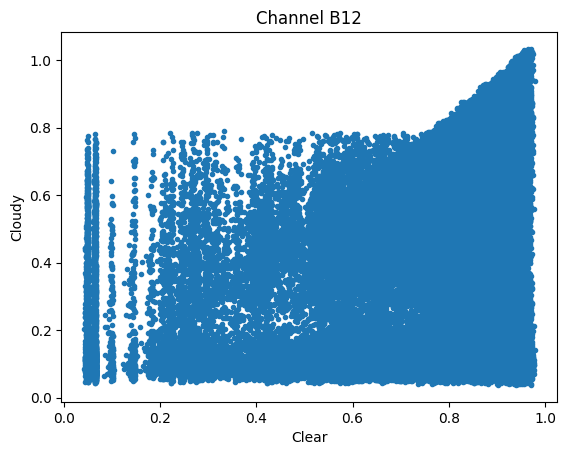

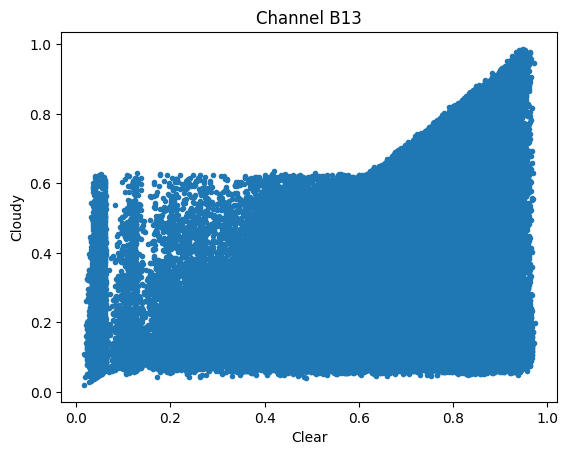

In [10]:
for i in range(2,14):
    
    if i<=9:
        plt.plot(data_all['Clear_B0'+str(i)],data_all['Cloud_B0'+str(i)],'.')
        plt.title('Channel B0'+str(i))
        plt.xlabel('Clear')
        plt.ylabel('Cloudy')
        plt.show()
    else:
        plt.plot(data_all['Clear_B'+str(i)],data_all['Cloud_B'+str(i)],'.')
        plt.title('Channel B'+str(i))
        plt.xlabel('Clear')
        plt.ylabel('Cloudy')
        plt.show()

In [11]:
cloudy_columns=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05',
                'Cloud_B06', 'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10',
                'Cloud_B11', 'Cloud_B12', 'Cloud_B13']

clear_columns=['Clear_B02','Clear_B03', 'Clear_B04', 
               'Clear_B05', 'Clear_B06', 'Clear_B07','Clear_B08', 
               'Clear_B09', 'Clear_B10', 'Clear_B11', 'Clear_B12',
                'Clear_B13']

channel_columns=['Cloud_B02', 'Cloud_B03', 'Cloud_B04', 'Cloud_B05',
                'Cloud_B06', 'Cloud_B07', 'Cloud_B08', 'Cloud_B09', 'Cloud_B10',
                'Cloud_B11', 'Cloud_B12', 'Cloud_B13',
                'Clear_B02','Clear_B03', 'Clear_B04', 
                'Clear_B05', 'Clear_B06', 'Clear_B07','Clear_B08', 
                'Clear_B09', 'Clear_B10', 'Clear_B11', 'Clear_B12',
                'Clear_B13']

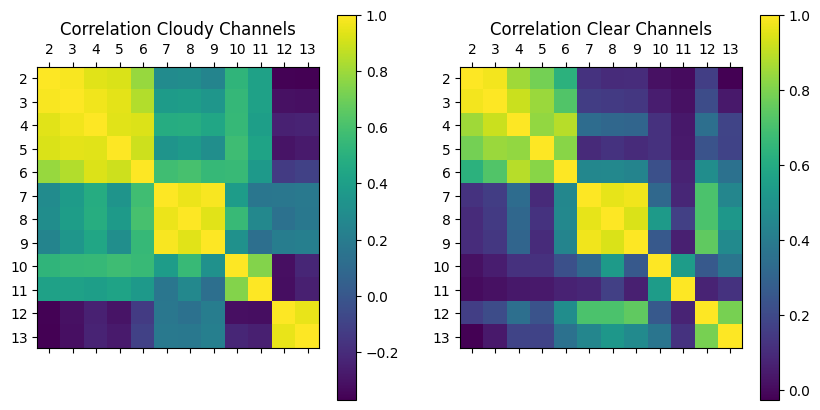

In [12]:
plt.rcParams["figure.figsize"] = [10, 5]
fig, (ax1, ax2) = plt.subplots(1,2)
fig_1=ax1.matshow(data_all[cloudy_columns].corr())
fig_2=ax2.matshow(data_all[clear_columns].corr())
fig.colorbar(fig_1,ax=ax1)
fig.colorbar(fig_2,ax=ax2)

#Set titles
ax1.title.set_text('Correlation Cloudy Channels')
ax2.title.set_text('Correlation Clear Channels')

#Set ticks subplot 1
ax1.set_xticks(range(0,12))
ax1.set_yticks(range(0,12))
ax1.set_xticklabels(range(2,14))
ax1.set_yticklabels(range(2,14))

ax2.set_xticks(range(0,12))
ax2.set_yticks(range(0,12))
ax2.set_xticklabels(range(2,14))
ax2.set_yticklabels(range(2,14))

plt.show()

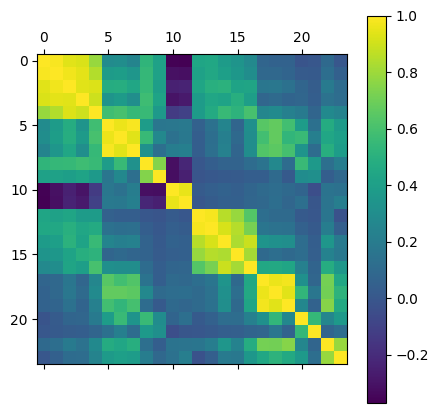

In [13]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.matshow(data_all[channel_columns].corr())
plt.colorbar()

## Eigenvalue decomposition

In [32]:
cloudy_cov=data_all[cloudy_columns].corr()
[U,S,V]=np.linalg.svd(cloudy_cov)

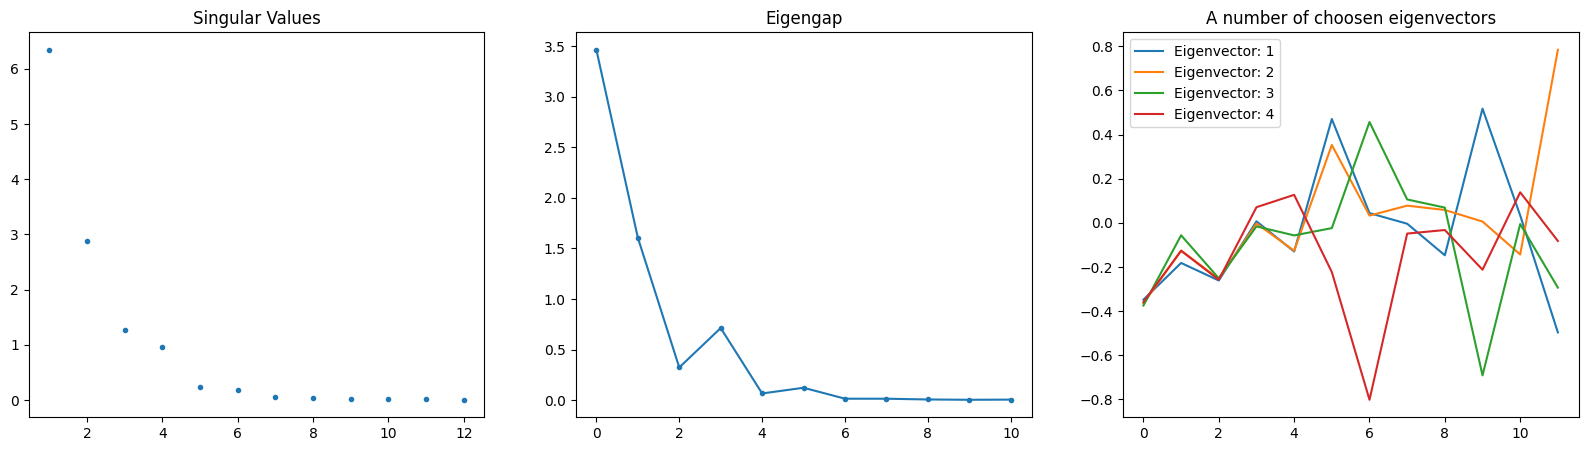

In [69]:
x=[i+1 for i in range(12)]
plt.rcParams["figure.figsize"] = [20, 5]
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.plot(x,S,'.')
ax1.title.set_text('Singular Values')


ax2.plot(S[0:-1]-S[1:],'.-')
ax2.title.set_text('Eigengap')

num_eigenvecs=4
ax3.plot(V[:,0:num_eigenvecs])
ax3.title.set_text('A number of choosen eigenvectors')
ax3.legend(["Eigenvector: "+str(i+1) for i in range(num_eigenvecs)])
plt.show()

### Seems to be a large gap between singular values 4 and 5. Do we then have about 4 independent channels?